# Regression
by. Ari Sulistiyo Prabowo
____

**Contents**:
1. What is linear regression model
2. Applied regression model
  - Linear regression
  - Polynomial regression
  - Decision tree regression
  - Gradient boosting regression

## What is linear regression model
A model that assume linear relationship between input variable (x) and output variable (y)
![picture](https://ilmudatapy.com/wp-content/uploads/2020/07/simple-linear-regression-2.png)

There are two types of regression:
- **Simple linear regression**: there is only one input variable and one target variable
- **Multiple linear regression**: there are more than one input variables and one target variable

![picture](https://miro.medium.com/max/1838/1*uLHXR8LKGDucpwUYHx3VaQ.png)

## Applied Linear Regression

In [40]:
#import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/insurance.csv")
display(data.shape)
data.head()

(1338, 7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Eploratory Data Analysis

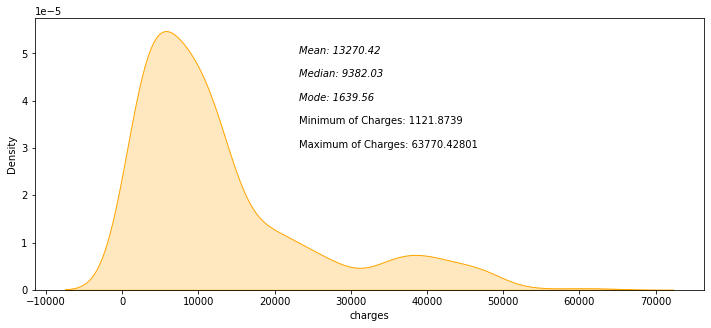

In [3]:
# perform the distribution of charges
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(data["charges"], color='orange', kde_kws={'shade':True}, hist=False,
             bins=10, ax=ax)

ax.text(data['charges'].mean() + 10000, 0.00005, "Mean: "+ str(round(data['charges'].mean(),2)), style='italic', fontsize=10)
ax.text(data['charges'].mean() + 10000, 0.000045, "Median: "+ str(round(data['charges'].median(),2)), style='italic', fontsize=10)
ax.text(data['charges'].mean() + 10000, 0.00004, "Mode: "+ str(round(data['charges'].mode()[0],2)), style='italic', fontsize=10)
ax.text(data['charges'].mean() + 10000, 0.000035, "Minimum of Charges: " + str(data['charges'].min()))
ax.text(data['charges'].mean() + 10000, 0.00003, "Maximum of Charges: " + str(data['charges'].max()))
plt.show()

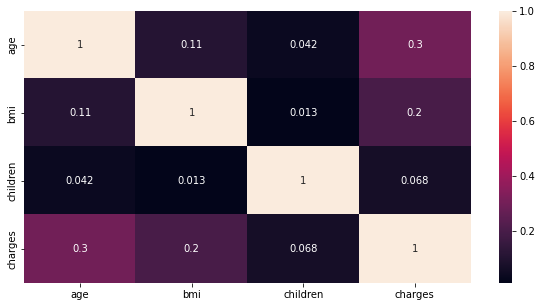

In [4]:
#show the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

It shows that charges of insurance has positive correlation with age 

## Data Pre-processing

In [5]:
display(data['sex'].unique())
display(data['region'].unique())
display(data['smoker'].unique())

array(['female', 'male'], dtype=object)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

array(['yes', 'no'], dtype=object)

In [6]:
#labeling the sex and region features
le = LabelEncoder()
cols = ['sex', 'region', 'smoker']
for i in cols:
  le.fit(data[i])
  data[i] = le.transform(data[i])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


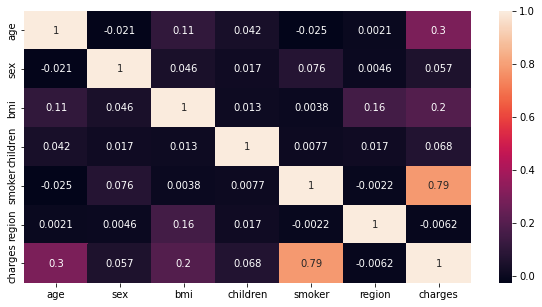

In [7]:
#show the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

Then we can see that a smoker is very related to the charge of insurance

## Modelling

### Benchmark

In [91]:
def benchmark(model):

  X = data.drop(columns='charges')
  y = data['charges']

  #splitting data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print("R2 training: {:.3f}".format(r2_score(y_train, y_train_pred)))
  print("R2 testing: {:.3f}".format(r2_score(y_test, y_test_pred)))

In [92]:
# Linear Regression
benchmark(LinearRegression())

R2 training: 0.764
R2 testing: 0.694


In [93]:
# Decision tree
benchmark(DecisionTreeRegressor())

R2 training: 0.998
R2 testing: 0.652


In [94]:
# Gradient Boosting
benchmark(GradientBoostingRegressor())

R2 training: 0.920
R2 testing: 0.781


### Model with Polynomial Degree

In [83]:
def model_poly(model):
  for i in list(range(2,6)):
    pol = PolynomialFeatures(degree=i)
    x_pol = pol.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.3, random_state=43)

    plr = model
    plr.fit(X_train, y_train)

    y_train_pred = plr.predict(X_train)
    y_test_pred = plr.predict(X_test)

    print("Degree",i)
    print("R2 training: {:.3f}".format(r2_score(y_train, y_train_pred)))
    print("R2 testing: {:.3f}".format(r2_score(y_test, y_test_pred)))
    print()

In [84]:
# Linear Regression
model_poly(LinearRegression())

Degree 2
R2 training: 0.856
R2 testing: 0.820

Degree 3
R2 training: 0.866
R2 testing: 0.818

Degree 4
R2 training: 0.879
R2 testing: 0.797

Degree 5
R2 training: 0.903
R2 testing: 0.530



In [85]:
# Decision Tree
model_poly(DecisionTreeRegressor())

Degree 2
R2 training: 0.999
R2 testing: 0.711

Degree 3
R2 training: 0.999
R2 testing: 0.759

Degree 4
R2 training: 0.999
R2 testing: 0.760

Degree 5
R2 training: 0.999
R2 testing: 0.769



In [86]:
# Gradient Boosting
model_poly(GradientBoostingRegressor())

Degree 2
R2 training: 0.932
R2 testing: 0.841

Degree 3
R2 training: 0.938
R2 testing: 0.844

Degree 4
R2 training: 0.946
R2 testing: 0.843

Degree 5
R2 training: 0.946
R2 testing: 0.841

